# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int,copy=False)

clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

C:\Users\otorr\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


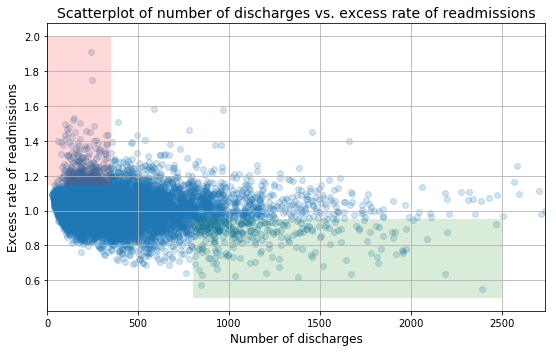

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [5]:
# First I will separate the data between less than 100 Number of Discharges and more than 1000 Number of Discharges
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print("small discharge hosptials:",len(small),"\nlarge discharge hospitals:",len(large),"\nother hospitals:",
      len(clean_hospital_read_df)-len(small)-len(large))

print("Total Number of hospitals in the data:",len(clean_hospital_read_df))

small discharge hosptials: 1269 
large discharge hospitals: 463 
other hospitals: 9846
Total Number of hospitals in the data: 11578


As we can see from the above results.  We have 3 groups in the data.  Two of which we are interested in analyzing statistically.

One group of hospitals is 100 or less discharges.  This group is composed of 1,269 data samples

The other group is of hospitals of 1000 or more discharges.  This group is composed of 463 data samples.

Now that we have the two groups.  I will clean the data from the small group to drop the hospitals with 0 discharges.

In [6]:

#Update the small group to include only the Excess Readmission Ratio
small_excess = small['Excess Readmission Ratio']

#Drop all samples with 0 readmissions or in other words NaN data value for excess Ratio.
small_excess_clean = small_excess.dropna()

#Rename the column to Err that includes the hospital's excess ratio.
df_small = small_excess_clean.to_frame(name='Err')


# Repeat the process for the large hospital
large_excess = large['Excess Readmission Ratio']
large_excess_clean = large_excess.dropna()
df_large = large_excess_clean.to_frame(name='Err')

#Now we print the means and total number of samples of each group
print("Small Hospitals Mean:",df_small['Err'].mean(),"\nNumber Small Hospitals:",len(df_small))
print("\nLarge Hospitals Mean:",df_large['Err'].mean(),"\nNumber Large Hospitals:",len(df_large))

Small Hospitals Mean: 1.0226183501683506 
Number Small Hospitals: 1188

Large Hospitals Mean: 0.9783354211663071 
Number Large Hospitals: 463


As we can see from the above results, we have the mean ratio of small hospitals at 1.023 and large hospitals at 0.978

Since we have a large number of samples we can say that they are normally distributed.

We will now perform a t statistic test of difference in means with two groups of different amount of samples.(since small group contains 1188 samples and large group contains 463 samples)

Our null hypothesis for this test is that the difference in means are equal for their Excess Readmission Ratio between both groups.  Our alternate hypothesis is that there is a significan difference in means of this value between both groups.

In [7]:
import statsmodels as sm
from statsmodels.stats.weightstats import DescrStatsW
import scipy.stats as stats
import math

#we use the python method ttest_ind() to calculate the pvalue.  We set equal_var to False since we have different samples in
#groups.
tstat, pvalue = stats.ttest_ind(df_small['Err'], df_large['Err'], equal_var = False)

print("t statistic:", tstat)
print("pvalue:", pvalue)


t statistic: 7.6017424185
pvalue: 1.27524354511e-13


Since the calculated pvalue is much smaller than our calculated value of significance of .01, we can reject the null hypothesis.  By rejecting the null hypothesis we are concluding that there is a significant difference of excess readmission ratio between hospital groups of less than 100 readmission compared to large hospitals of 1000 or more readmissions.  This shows that the original report findings can be statistically proven.


Now I decided to do a second t test with both groups.  But this time each hospital with excess readmission will have a 1 value and the ones without excess(ratio less than 1) will have a 0 value.  This will be more efficient and throw out the possibility of higher ratios affecting the overall results of the test.

In [8]:

#We add a data column to the groups named 'E'.  Which will be 1 if the excess ratio is over 1.0 or 0 otherwise.
df_small['E'] = np.where(df_small['Err']>1, 1, 0)
df_large['E'] = np.where(df_large['Err']>1, 1, 0)
df_small.head()

,Err,E
1832,1.0914,1
1699,1.0961,1
1774,1.0934,1
1853,1.0908,1
1290,1.1123,1


In [9]:
#we use the python method ttest_ind() to calculate the pvalue.  We set equal_var to False since we have different samples in
#groups.
tstat, pvalue = stats.ttest_ind(df_small['E'], df_large['E'], equal_var = False)

print("Percent of small hospital in excess",df_small['E'].mean())
print("Percent of large hospital in excess",df_large['E'].mean())

print("t statistic:", tstat)
print("pvalue:", pvalue)

Percent of small hospital in excess 0.6321548821548821
Percent of large hospital in excess 0.4449244060475162
t statistic: 6.92752179859
pvalue: 8.66112886533e-12


As we can see from our result of the second t test.  The pvalue comes out to lower than our .01 signifance.  This means that the report findings are correct and there is a significant difference in means for small hospitals of 100 or less discharges and compared to large one of 1000 or more discharges.  The means calculated of 63% of small hospitals and only 44% hospitals in excess ratio agrees with the above report findings.

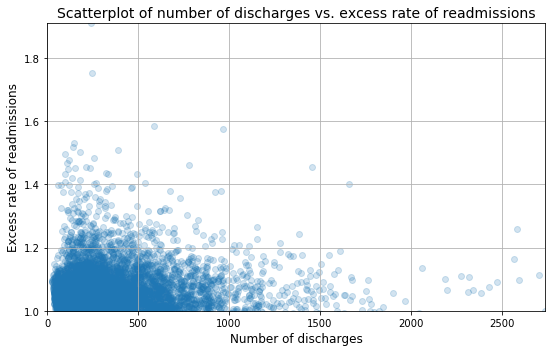

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_ylim([1, max(y)])

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Scatter plots can help visualize how the date is behaving.  I constructed the above plot that focuses directly on the problem we are trying to solve.  Here we can see exactly the number of hospitals exceeding the readmission rate(Readmission rate above 1.0).  And we clearly see that the number of hospitals exceeding the 1.0 ratio decreases significantly as the number of discharges increases.  This agrees with the original report findings but the plot focuses on the hospitals exceeding the readmission ratio.